In [1]:
# Importer les bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# Charger le jeu de données Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normaliser les images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Redimensionner les images pour ajouter une dimension de canal
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Construire le modèle CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(train_images, train_labels, epochs=10, batch_size=64)

# Évaluer le modèle
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/10
938/938 [==============================] - 54s 56ms/step - loss: 0.4804 - accuracy: 0.8268
Epoch 2/10
938/938 [==============================] - 49s 52ms/step - loss: 0.3158 - accuracy: 0.8848
Epoch 3/10
938/938 [==============================] - 48s 51ms/step - loss: 0.2691 - accuracy: 0.9004
Epoch 4/10
938/938 [==============================] - 49s 53ms/step - loss: 0.2384 - accuracy: 0.9123
Epoch 5/10
938/938 [==============================] - 48s 51ms/step - loss: 0.2128 - accuracy: 0.9208
Epoch 6/10
938/938 [==============================] - 49s 53ms/step - loss: 0.1924 - accuracy: 0.9283
Epoch 7/10
938/938 [==============================] - 47s 51ms/step - loss: 0.1710 - accuracy: 0.9358
Epoch 8/10
938/938 [==============================] - 49s 52ms/step - loss: 0.1571 - accuracy: 0.9409
Epoch 9/10
938/938 [==============================] - 48s 51ms/step - loss: 0.1396 - accuracy: 0.9484
Epoch 10/10
313/313

313/313 [==============================] - 6s 17ms/step
Matrice de confusion :
 [[922   0   8  12   3   1  48   0   6   0]
 [  4 976   0  18   1   0   1   0   0   0]
 [ 26   0 862   9  40   0  58   1   4   0]
 [ 31   1   8 906  33   0  21   0   0   0]
 [  2   1  47  17 879   1  52   0   1   0]
 [  0   0   0   0   0 971   0  24   0   5]
 [156   1  47  21  56   0 711   0   8   0]
 [  0   0   0   0   0   4   0 987   0   9]
 [  3   1   3   3   1   3   2   3 981   0]
 [  0   0   0   0   0   6   0  45   0 949]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.88      0.86      0.87      1000
           3       0.92      0.91      0.91      1000
           4       0.87      0.88      0.87      1000
           5       0.98      0.97      0.98      1000
           6       0.80      0.71      0.75      1000
           7       0.93   

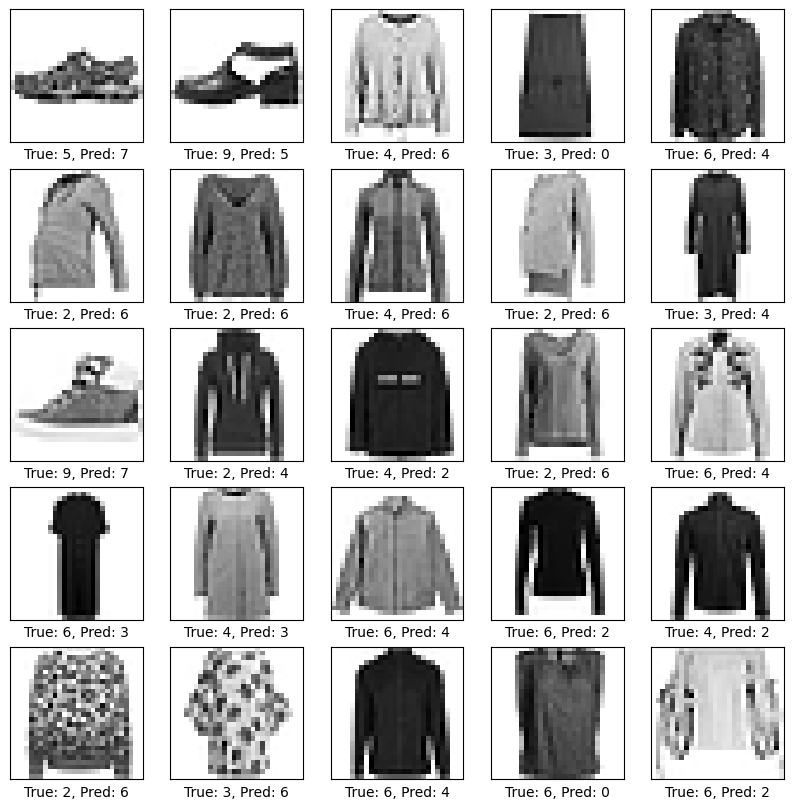

In [2]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Prédictions sur l'ensemble de test
predicted_labels = model.predict(test_images)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Matrice de confusion
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print("Matrice de confusion :\n", conf_matrix)

# Rapport de classification
class_report = classification_report(test_labels, predicted_labels)
print("\nRapport de classification :\n", class_report)

# Fonction pour visualiser les erreurs
def plot_image_errors(images, true_labels, pred_labels):
    incorrect = (true_labels != pred_labels)
    incorrect_images = images[incorrect]
    incorrect_pred_labels = pred_labels[incorrect]
    incorrect_true_labels = true_labels[incorrect]

    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(incorrect_images[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(f"True: {incorrect_true_labels[i]}, Pred: {incorrect_pred_labels[i]}")
    plt.show()

# Visualiser quelques exemples d'erreurs
plot_image_errors(test_images, test_labels, predicted_labels)
